In [1]:
%matplotlib nbagg
%load_ext autoreload

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from libertem.api import Context
from libertem.executor.inline import InlineJobExecutor
from libertem.utils.generate import cbed_frame

In [3]:
from libertem_blobfinder.common.patterns import BackgroundSubtraction
from libertem_blobfinder.udf.integration import IntegrationUDF

c:\users\weber\documents\libertem\libertem-blobfinder\src\libertem_blobfinder\base\correlation.py:28: NumbaDeprecationWarning: No direct replacement for 'numba.unsafe' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.unsafe.ndarray import to_fixed_tuple
c:\users\weber\documents\libertem\libertem-blobfinder\src\libertem_blobfinder\base\correlation.py:28: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.unsafe.ndarray', please update to use 'numba.np.unsafe.ndarray' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.unsafe.ndarray import to_fixed_tuple
c:\users\weber\documents\libertem\libertem-blobfinder\src\libertem_blobfinder\base\correlation.py:28: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'to_fixed_tuple' requested from: 'numba.unsafe.ndarray', please update to use 'numba

In [4]:
ctx = Context(executor=InlineJobExecutor())

In [5]:
(data, indices, peaks) = cbed_frame()

<IPython.core.display.Javascript object>


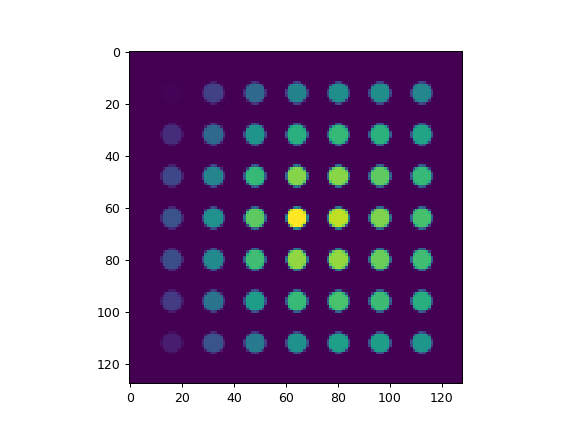

In [6]:
fig, axes = plt.subplots()
axes.imshow(data[0])

In [7]:
stacked_data = np.concatenate((data, data), axis=0)
stacked_data = np.stack((stacked_data, stacked_data), axis=0)
ds = ctx.load("memory", data=stacked_data)
stacked_peaks = np.stack((peaks, peaks), axis=0)
stacked_peaks = np.stack((stacked_peaks, stacked_peaks), axis=0)


(2, 2, 49, 2)


In [14]:
%autoreload
print("ds shape", ds.shape)
print("stacked peaks", stacked_peaks.shape)
centers = IntegrationUDF.aux_data(data=stacked_peaks.astype(np.int), kind='nav', dtype=np.int, extra_shape=stacked_peaks.shape[-2:])

udf = IntegrationUDF(centers=centers, pattern=BackgroundSubtraction(4))
res = ctx.run_udf(udf=udf, dataset=ds)

ds shape (2, 2, 128, 128)
stacked peaks (2, 2, 49, 2)
task data (2, 49, 2)
process frame (49, 2)
process frame (49, 2)
task data (2, 49, 2)
process frame (49, 2)
process frame (49, 2)


In [11]:
res['integration'].data.shape

(2, 2, 49)